# QuantSeq 3' RNA-seq

In [1]:
import pandas as pd
import numpy as np

In [2]:
quantseqdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/raw_fastq_file/QuantSeq_3_mRNA_seq/remove_false_positive/positive_output.tsv',delimiter='\t')
quantseqdf

,PAS,y_pred,y_score
0,chr1_+_854087_854100,[1],[0.99999976]
1,chr1_+_854382_854410,[1],[0.80010337]
2,chr1_+_857136_857191,[1],[0.78251547]
3,chr1_+_965634_965721,[1],[1.]
4,chr1_+_1014484_1014539,[1],[1.]
...,...,...,...
28160,chrY_-_16444824_16444830,[1],[1.]
28161,chrY_-_16924822_16924831,[1],[1.]
28162,chrY_-_17138779_17138817,[1],[0.9999995]
28163,chrY_-_19678043_19678066,[1],[0.99982363]


In [3]:
quantseqdf['chr']=quantseqdf['PAS'].str.split('_',expand=True)[0]
quantseqdf['strand']=quantseqdf['PAS'].str.split('_',expand=True)[1]
quantseqdf['start']=quantseqdf['PAS'].str.split('_',expand=True)[2]
quantseqdf['end']=quantseqdf['PAS'].str.split('_',expand=True)[3]
quantseqdf

,PAS,y_pred,y_score,chr,strand,start,end
0,chr1_+_854087_854100,[1],[0.99999976],chr1,+,854087,854100
1,chr1_+_854382_854410,[1],[0.80010337],chr1,+,854382,854410
2,chr1_+_857136_857191,[1],[0.78251547],chr1,+,857136,857191
3,chr1_+_965634_965721,[1],[1.],chr1,+,965634,965721
4,chr1_+_1014484_1014539,[1],[1.],chr1,+,1014484,1014539
...,...,...,...,...,...,...,...
28160,chrY_-_16444824_16444830,[1],[1.],chrY,-,16444824,16444830
28161,chrY_-_16924822_16924831,[1],[1.],chrY,-,16924822,16924831
28162,chrY_-_17138779_17138817,[1],[0.9999995],chrY,-,17138779,17138817
28163,chrY_-_19678043_19678066,[1],[0.99982363],chrY,-,19678043,19678066


In [4]:
quantseqdf['PAS_point']=np.where(quantseqdf['strand']=='+',quantseqdf['end'],quantseqdf['start'])
quantseqdf

,PAS,y_pred,y_score,chr,strand,start,end,PAS_point
0,chr1_+_854087_854100,[1],[0.99999976],chr1,+,854087,854100,854100
1,chr1_+_854382_854410,[1],[0.80010337],chr1,+,854382,854410,854410
2,chr1_+_857136_857191,[1],[0.78251547],chr1,+,857136,857191,857191
3,chr1_+_965634_965721,[1],[1.],chr1,+,965634,965721,965721
4,chr1_+_1014484_1014539,[1],[1.],chr1,+,1014484,1014539,1014539
...,...,...,...,...,...,...,...,...
28160,chrY_-_16444824_16444830,[1],[1.],chrY,-,16444824,16444830,16444824
28161,chrY_-_16924822_16924831,[1],[1.],chrY,-,16924822,16924831,16924822
28162,chrY_-_17138779_17138817,[1],[0.9999995],chrY,-,17138779,17138817,17138779
28163,chrY_-_19678043_19678066,[1],[0.99982363],chrY,-,19678043,19678066,19678043


In [5]:
quantseqdf['upstream_100bp']=quantseqdf['PAS_point'].astype('int')-100
quantseqdf['downstream_100bp']=quantseqdf['PAS_point'].astype('int')+100
quantseqdf

,PAS,y_pred,y_score,chr,strand,start,end,PAS_point,upstream_100bp,downstream_100bp
0,chr1_+_854087_854100,[1],[0.99999976],chr1,+,854087,854100,854100,854000,854200
1,chr1_+_854382_854410,[1],[0.80010337],chr1,+,854382,854410,854410,854310,854510
2,chr1_+_857136_857191,[1],[0.78251547],chr1,+,857136,857191,857191,857091,857291
3,chr1_+_965634_965721,[1],[1.],chr1,+,965634,965721,965721,965621,965821
4,chr1_+_1014484_1014539,[1],[1.],chr1,+,1014484,1014539,1014539,1014439,1014639
...,...,...,...,...,...,...,...,...,...,...
28160,chrY_-_16444824_16444830,[1],[1.],chrY,-,16444824,16444830,16444824,16444724,16444924
28161,chrY_-_16924822_16924831,[1],[1.],chrY,-,16924822,16924831,16924822,16924722,16924922
28162,chrY_-_17138779_17138817,[1],[0.9999995],chrY,-,17138779,17138817,17138779,17138679,17138879
28163,chrY_-_19678043_19678066,[1],[0.99982363],chrY,-,19678043,19678066,19678043,19677943,19678143


In [6]:
quantseqdf['score']=0

In [7]:
quantbed=quantseqdf[['chr','upstream_100bp','downstream_100bp','PAS','score','strand']]
quantbed

,chr,upstream_100bp,downstream_100bp,PAS,score,strand
0,chr1,854000,854200,chr1_+_854087_854100,0,+
1,chr1,854310,854510,chr1_+_854382_854410,0,+
2,chr1,857091,857291,chr1_+_857136_857191,0,+
3,chr1,965621,965821,chr1_+_965634_965721,0,+
4,chr1,1014439,1014639,chr1_+_1014484_1014539,0,+
...,...,...,...,...,...,...
28160,chrY,16444724,16444924,chrY_-_16444824_16444830,0,-
28161,chrY,16924722,16924922,chrY_-_16924822_16924831,0,-
28162,chrY,17138679,17138879,chrY_-_17138779_17138817,0,-
28163,chrY,19677943,19678143,chrY_-_19678043_19678066,0,-


In [8]:
quantbed.sort_values(['chr','upstream_100bp','downstream_100bp'],inplace=True)
quantbed

/tmp/ipykernel_4134065/3167114603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantbed.sort_values(['chr','upstream_100bp','downstream_100bp'],inplace=True)


,chr,upstream_100bp,downstream_100bp,PAS,score,strand
1498,chr1,77528,77728,chr1_-_77628_77639,0,-
1499,chr1,633830,634030,chr1_-_633930_634022,0,-
1500,chr1,826094,826294,chr1_-_826194_826214,0,-
0,chr1,854000,854200,chr1_+_854087_854100,0,+
1,chr1,854310,854510,chr1_+_854382_854410,0,+
...,...,...,...,...,...,...
28154,chrY,19408018,19408218,chrY_+_19408099_19408118,0,+
28163,chrY,19677943,19678143,chrY_-_19678043_19678066,0,-
28164,chrY,20829005,20829205,chrY_-_20829105_20829176,0,-
28155,chrY,20883061,20883261,chrY_+_20883154_20883161,0,+


In [9]:
#quantbed.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/bed_intersect_change_scTail/quantseq_k562.bed',sep='\t',header=None,index=None)

# scTail 

In [10]:
import pandas as pd
import numpy as np

In [11]:
df=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/run_scTail/k562_scRNA_seq_mincount_50/count/positive_result.bed',header=None,delimiter='\t')
df

,0,1,2,3,4,5
0,chr1,268614,268655,chr1_+_268614_268655,0,+
1,chr1,841963,842002,chr1_+_841963_842002,0,+
2,chr1,854062,854096,chr1_+_854062_854096,0,+
3,chr1,854359,854424,chr1_+_854359_854424,0,+
4,chr1,857136,857195,chr1_+_857136_857195,0,+
...,...,...,...,...,...,...
19871,chrX,154676162,154676245,chrX_-_154676162_154676245,0,-
19872,chrX,154778683,154778783,chrX_-_154778683_154778783,0,-
19873,chrX,154779236,154779285,chrX_-_154779236_154779285,0,-
19874,chrX,155276210,155276255,chrX_-_155276210_155276255,0,-


In [12]:
df['PAS']=np.where(df[5]=='+',df[2],df[1])
df

,0,1,2,3,4,5,PAS
0,chr1,268614,268655,chr1_+_268614_268655,0,+,268655
1,chr1,841963,842002,chr1_+_841963_842002,0,+,842002
2,chr1,854062,854096,chr1_+_854062_854096,0,+,854096
3,chr1,854359,854424,chr1_+_854359_854424,0,+,854424
4,chr1,857136,857195,chr1_+_857136_857195,0,+,857195
...,...,...,...,...,...,...,...
19871,chrX,154676162,154676245,chrX_-_154676162_154676245,0,-,154676162
19872,chrX,154778683,154778783,chrX_-_154778683_154778783,0,-,154778683
19873,chrX,154779236,154779285,chrX_-_154779236_154779285,0,-,154779236
19874,chrX,155276210,155276255,chrX_-_155276210_155276255,0,-,155276210


In [13]:
df['upstream_100bp']=df['PAS']-100
df['downstream_100bp']=df['PAS']+100
df

,0,1,2,3,4,5,PAS,upstream_100bp,downstream_100bp
0,chr1,268614,268655,chr1_+_268614_268655,0,+,268655,268555,268755
1,chr1,841963,842002,chr1_+_841963_842002,0,+,842002,841902,842102
2,chr1,854062,854096,chr1_+_854062_854096,0,+,854096,853996,854196
3,chr1,854359,854424,chr1_+_854359_854424,0,+,854424,854324,854524
4,chr1,857136,857195,chr1_+_857136_857195,0,+,857195,857095,857295
...,...,...,...,...,...,...,...,...,...
19871,chrX,154676162,154676245,chrX_-_154676162_154676245,0,-,154676162,154676062,154676262
19872,chrX,154778683,154778783,chrX_-_154778683_154778783,0,-,154778683,154778583,154778783
19873,chrX,154779236,154779285,chrX_-_154779236_154779285,0,-,154779236,154779136,154779336
19874,chrX,155276210,155276255,chrX_-_155276210_155276255,0,-,155276210,155276110,155276310


In [14]:
df['score']=0
df

,0,1,2,3,4,5,PAS,upstream_100bp,downstream_100bp,score
0,chr1,268614,268655,chr1_+_268614_268655,0,+,268655,268555,268755,0
1,chr1,841963,842002,chr1_+_841963_842002,0,+,842002,841902,842102,0
2,chr1,854062,854096,chr1_+_854062_854096,0,+,854096,853996,854196,0
3,chr1,854359,854424,chr1_+_854359_854424,0,+,854424,854324,854524,0
4,chr1,857136,857195,chr1_+_857136_857195,0,+,857195,857095,857295,0
...,...,...,...,...,...,...,...,...,...,...
19871,chrX,154676162,154676245,chrX_-_154676162_154676245,0,-,154676162,154676062,154676262,0
19872,chrX,154778683,154778783,chrX_-_154778683_154778783,0,-,154778683,154778583,154778783,0
19873,chrX,154779236,154779285,chrX_-_154779236_154779285,0,-,154779236,154779136,154779336,0
19874,chrX,155276210,155276255,chrX_-_155276210_155276255,0,-,155276210,155276110,155276310,0


In [15]:
bed=df[[0,'upstream_100bp','downstream_100bp',3,4,5]]
bed

,0,upstream_100bp,downstream_100bp,3,4,5
0,chr1,268555,268755,chr1_+_268614_268655,0,+
1,chr1,841902,842102,chr1_+_841963_842002,0,+
2,chr1,853996,854196,chr1_+_854062_854096,0,+
3,chr1,854324,854524,chr1_+_854359_854424,0,+
4,chr1,857095,857295,chr1_+_857136_857195,0,+
...,...,...,...,...,...,...
19871,chrX,154676062,154676262,chrX_-_154676162_154676245,0,-
19872,chrX,154778583,154778783,chrX_-_154778683_154778783,0,-
19873,chrX,154779136,154779336,chrX_-_154779236_154779285,0,-
19874,chrX,155276110,155276310,chrX_-_155276210_155276255,0,-


In [16]:
bed.sort_values([0,'upstream_100bp','downstream_100bp'],inplace=True)
bed

/tmp/ipykernel_4134065/3281881595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed.sort_values([0,'upstream_100bp','downstream_100bp'],inplace=True)


,0,upstream_100bp,downstream_100bp,3,4,5
0,chr1,268555,268755,chr1_+_268614_268655,0,+
1041,chr1,826092,826292,chr1_-_826192_826246,0,-
1,chr1,841902,842102,chr1_+_841963_842002,0,+
2,chr1,853996,854196,chr1_+_854062_854096,0,+
3,chr1,854324,854524,chr1_+_854359_854424,0,+
...,...,...,...,...,...,...
19569,chrX,155238901,155239101,chrX_+_155238912_155239001,0,+
19570,chrX,155239419,155239619,chrX_+_155239481_155239519,0,+
19571,chrX,155239725,155239925,chrX_+_155239770_155239825,0,+
19874,chrX,155276110,155276310,chrX_-_155276210_155276255,0,-


In [17]:
#bed.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/bed_intersect_change_scTail/scTail_k562.bed',sep='\t',header=None,index=None)

# Sierra

In [18]:
import pandas as pd
import numpy as np

In [19]:
df=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/run_sierra/K562_peaks.txt',delimiter='\t')
df

,Gene,Chr,Strand,MaxPosition,Fit.max.pos,Fit.start,Fit.end,mu,sigma,k,exon.intron,exon.pos,LogLik,polyA_ID
0,BAD,chr11,-1,64269998,64269870,64269830,64270095,172.719807,75.966294,6473.784619,no-junctions,NaN,-2947.705920,BAD:chr11:64269830-64270095:-1
1,DPM1,chr20,-1,50935041,50934913,50934867,50935153,172.909044,80.146453,6412.245512,no-junctions,NaN,-3111.773207,DPM1:chr20:50934867-50935153:-1
2,DPM1,chr20,-1,50945884,50945873,50940791,50955391,289.266259,96.943166,1437.711226,across-junctions,"(50940791,50940932)(50942031,50942125)(5094573...",-3362.025603,DPM1:chr20:50940791-50955391:-1
3,SCYL3,chr1,-1,169853261,169853252,169853024,169853480,291.567352,76.507076,192.825270,no-junctions,NaN,-1851.572569,SCYL3:chr1:169853024-169853480:-1
4,LAP3,chr4,1,17607799,17607810,17607570,17607972,311.167398,80.163640,6223.514104,no-junctions,NaN,-3143.297019,LAP3:chr4:17607570-17607972:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36800,AC010378.2,chr5,1,139511188,139511201,139510958,139511374,313.127422,81.882988,207.823703,no-junctions,NaN,-1598.185916,AC010378.2:chr5:139510958-139511374:1
36801,AL021918.5,chr6,1,27473489,27473478,27473256,27473700,289.872610,74.837900,1297.534276,no-junctions,NaN,-3450.824057,AL021918.5:chr6:27473256-27473700:1
36802,AL137001.2,chr13,-1,19074196,19074058,19074038,19113116,162.106928,70.285522,1565.501072,across-junctions,"(19074038,19074260)(19113109,19113116)",-2455.180191,AL137001.2:chr13:19074038-19113116:-1
36803,AL137001.2,chr13,-1,19089207,19089232,19089151,19089313,14971.705979,27.071253,203.463836,no-junctions,NaN,-157866.367832,AL137001.2:chr13:19089151-19089313:-1


In [20]:
bed=df[['Chr','Fit.start','Fit.end','Strand','polyA_ID']]
bed

,Chr,Fit.start,Fit.end,Strand,polyA_ID
0,chr11,64269830,64270095,-1,BAD:chr11:64269830-64270095:-1
1,chr20,50934867,50935153,-1,DPM1:chr20:50934867-50935153:-1
2,chr20,50940791,50955391,-1,DPM1:chr20:50940791-50955391:-1
3,chr1,169853024,169853480,-1,SCYL3:chr1:169853024-169853480:-1
4,chr4,17607570,17607972,1,LAP3:chr4:17607570-17607972:1
...,...,...,...,...,...
36800,chr5,139510958,139511374,1,AC010378.2:chr5:139510958-139511374:1
36801,chr6,27473256,27473700,1,AL021918.5:chr6:27473256-27473700:1
36802,chr13,19074038,19113116,-1,AL137001.2:chr13:19074038-19113116:-1
36803,chr13,19089151,19089313,-1,AL137001.2:chr13:19089151-19089313:-1


In [21]:
bed['score']=0
bed

/tmp/ipykernel_4134065/1727096656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed['score']=0


,Chr,Fit.start,Fit.end,Strand,polyA_ID,score
0,chr11,64269830,64270095,-1,BAD:chr11:64269830-64270095:-1,0
1,chr20,50934867,50935153,-1,DPM1:chr20:50934867-50935153:-1,0
2,chr20,50940791,50955391,-1,DPM1:chr20:50940791-50955391:-1,0
3,chr1,169853024,169853480,-1,SCYL3:chr1:169853024-169853480:-1,0
4,chr4,17607570,17607972,1,LAP3:chr4:17607570-17607972:1,0
...,...,...,...,...,...,...
36800,chr5,139510958,139511374,1,AC010378.2:chr5:139510958-139511374:1,0
36801,chr6,27473256,27473700,1,AL021918.5:chr6:27473256-27473700:1,0
36802,chr13,19074038,19113116,-1,AL137001.2:chr13:19074038-19113116:-1,0
36803,chr13,19089151,19089313,-1,AL137001.2:chr13:19089151-19089313:-1,0


In [22]:
bed['Strand']=bed['Strand'].replace({-1:'-',1:'+'})
bed

/tmp/ipykernel_4134065/2988075243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed['Strand']=bed['Strand'].replace({-1:'-',1:'+'})


,Chr,Fit.start,Fit.end,Strand,polyA_ID,score
0,chr11,64269830,64270095,-,BAD:chr11:64269830-64270095:-1,0
1,chr20,50934867,50935153,-,DPM1:chr20:50934867-50935153:-1,0
2,chr20,50940791,50955391,-,DPM1:chr20:50940791-50955391:-1,0
3,chr1,169853024,169853480,-,SCYL3:chr1:169853024-169853480:-1,0
4,chr4,17607570,17607972,+,LAP3:chr4:17607570-17607972:1,0
...,...,...,...,...,...,...
36800,chr5,139510958,139511374,+,AC010378.2:chr5:139510958-139511374:1,0
36801,chr6,27473256,27473700,+,AL021918.5:chr6:27473256-27473700:1,0
36802,chr13,19074038,19113116,-,AL137001.2:chr13:19074038-19113116:-1,0
36803,chr13,19089151,19089313,-,AL137001.2:chr13:19089151-19089313:-1,0


In [23]:
bed['PAS']=np.where(bed['Strand']=='+',bed['Fit.end'],bed['Fit.start'])
bed

/tmp/ipykernel_4134065/2559196320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed['PAS']=np.where(bed['Strand']=='+',bed['Fit.end'],bed['Fit.start'])


,Chr,Fit.start,Fit.end,Strand,polyA_ID,score,PAS
0,chr11,64269830,64270095,-,BAD:chr11:64269830-64270095:-1,0,64269830
1,chr20,50934867,50935153,-,DPM1:chr20:50934867-50935153:-1,0,50934867
2,chr20,50940791,50955391,-,DPM1:chr20:50940791-50955391:-1,0,50940791
3,chr1,169853024,169853480,-,SCYL3:chr1:169853024-169853480:-1,0,169853024
4,chr4,17607570,17607972,+,LAP3:chr4:17607570-17607972:1,0,17607972
...,...,...,...,...,...,...,...
36800,chr5,139510958,139511374,+,AC010378.2:chr5:139510958-139511374:1,0,139511374
36801,chr6,27473256,27473700,+,AL021918.5:chr6:27473256-27473700:1,0,27473700
36802,chr13,19074038,19113116,-,AL137001.2:chr13:19074038-19113116:-1,0,19074038
36803,chr13,19089151,19089313,-,AL137001.2:chr13:19089151-19089313:-1,0,19089151


In [24]:
bed['upstream_100']=bed['PAS']-100
bed['downstream_100']=bed['PAS']+100
bed

/tmp/ipykernel_4134065/4273436245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed['upstream_100']=bed['PAS']-100
/tmp/ipykernel_4134065/4273436245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed['downstream_100']=bed['PAS']+100


,Chr,Fit.start,Fit.end,Strand,polyA_ID,score,PAS,upstream_100,downstream_100
0,chr11,64269830,64270095,-,BAD:chr11:64269830-64270095:-1,0,64269830,64269730,64269930
1,chr20,50934867,50935153,-,DPM1:chr20:50934867-50935153:-1,0,50934867,50934767,50934967
2,chr20,50940791,50955391,-,DPM1:chr20:50940791-50955391:-1,0,50940791,50940691,50940891
3,chr1,169853024,169853480,-,SCYL3:chr1:169853024-169853480:-1,0,169853024,169852924,169853124
4,chr4,17607570,17607972,+,LAP3:chr4:17607570-17607972:1,0,17607972,17607872,17608072
...,...,...,...,...,...,...,...,...,...
36800,chr5,139510958,139511374,+,AC010378.2:chr5:139510958-139511374:1,0,139511374,139511274,139511474
36801,chr6,27473256,27473700,+,AL021918.5:chr6:27473256-27473700:1,0,27473700,27473600,27473800
36802,chr13,19074038,19113116,-,AL137001.2:chr13:19074038-19113116:-1,0,19074038,19073938,19074138
36803,chr13,19089151,19089313,-,AL137001.2:chr13:19089151-19089313:-1,0,19089151,19089051,19089251


In [25]:
beddf=bed[['Chr','upstream_100','downstream_100','polyA_ID','score','Strand']]
beddf

,Chr,upstream_100,downstream_100,polyA_ID,score,Strand
0,chr11,64269730,64269930,BAD:chr11:64269830-64270095:-1,0,-
1,chr20,50934767,50934967,DPM1:chr20:50934867-50935153:-1,0,-
2,chr20,50940691,50940891,DPM1:chr20:50940791-50955391:-1,0,-
3,chr1,169852924,169853124,SCYL3:chr1:169853024-169853480:-1,0,-
4,chr4,17607872,17608072,LAP3:chr4:17607570-17607972:1,0,+
...,...,...,...,...,...,...
36800,chr5,139511274,139511474,AC010378.2:chr5:139510958-139511374:1,0,+
36801,chr6,27473600,27473800,AL021918.5:chr6:27473256-27473700:1,0,+
36802,chr13,19073938,19074138,AL137001.2:chr13:19074038-19113116:-1,0,-
36803,chr13,19089051,19089251,AL137001.2:chr13:19089151-19089313:-1,0,-


In [26]:
beddf.sort_values(['Chr','upstream_100','downstream_100'],inplace=True)
beddf

/tmp/ipykernel_4134065/1386534950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beddf.sort_values(['Chr','upstream_100','downstream_100'],inplace=True)


,Chr,upstream_100,downstream_100,polyA_ID,score,Strand
36041,GL000009.2,56305,56505,BX004987.1:GL000009.2:56405-58167:-1,0,-
36459,GL000194.1,53490,53690,AC145212.1:GL000194.1:53590-53854:-1,0,-
35600,GL000194.1,53494,53694,MAFIP:GL000194.1:53594-53850:-1,0,-
35598,GL000194.1,61506,61706,MAFIP:GL000194.1:61606-62038:-1,0,-
36457,GL000194.1,61506,61706,AC145212.1:GL000194.1:61606-62038:-1,0,-
...,...,...,...,...,...,...
28413,chrX,155491223,155491423,TMLHE:chrX:155491323-155507137:-1,0,-
10876,chrX,155942075,155942275,VAMP7:chrX:155897878-155942175:1,0,+
10877,chrX,155943115,155943315,VAMP7:chrX:155942189-155943215:1,0,+
10875,chrX,155943669,155943869,VAMP7:chrX:155943385-155943769:1,0,+


In [ ]:
#beddf.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/bed_intersect_change_scTail/K562_sierra.bed',sep='\t',header=None,index=None)

# QuantSeq 3'RNA-seq Vs scTail

bedtools intersect -a quantseq_k562.bed -b scTail_k562.bed -wa -wb > quantseq_scTail_k562.bed

In [27]:
import pandas as pd

In [28]:
df=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/bed_intersect_change_scTail/quantseq_scTail_k562.bed',delimiter='\t',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,826094,826294,chr1_-_826194_826214,0,-,chr1,826092,826292,chr1_-_826192_826246,0,-
1,chr1,854000,854200,chr1_+_854087_854100,0,+,chr1,853996,854196,chr1_+_854062_854096,0,+
2,chr1,854310,854510,chr1_+_854382_854410,0,+,chr1,854324,854524,chr1_+_854359_854424,0,+
3,chr1,857091,857291,chr1_+_857136_857191,0,+,chr1,857095,857295,chr1_+_857136_857195,0,+
4,chr1,944102,944302,chr1_-_944202_944293,0,-,chr1,944102,944302,chr1_-_944202_944297,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...
17594,chrX,155122983,155123183,chrX_+_155123047_155123083,0,+,chrX,155122977,155123177,chrX_+_155123024_155123077,0,+
17595,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+,chrX,155238901,155239101,chrX_+_155238912_155239001,0,+
17596,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+,chrX,155239419,155239619,chrX_+_155239481_155239519,0,+
17597,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+,chrX,155239725,155239925,chrX_+_155239770_155239825,0,+


In [29]:
df.drop_duplicates(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,826094,826294,chr1_-_826194_826214,0,-,chr1,826092,826292,chr1_-_826192_826246,0,-
1,chr1,854000,854200,chr1_+_854087_854100,0,+,chr1,853996,854196,chr1_+_854062_854096,0,+
2,chr1,854310,854510,chr1_+_854382_854410,0,+,chr1,854324,854524,chr1_+_854359_854424,0,+
3,chr1,857091,857291,chr1_+_857136_857191,0,+,chr1,857095,857295,chr1_+_857136_857195,0,+
4,chr1,944102,944302,chr1_-_944202_944293,0,-,chr1,944102,944302,chr1_-_944202_944297,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...
17594,chrX,155122983,155123183,chrX_+_155123047_155123083,0,+,chrX,155122977,155123177,chrX_+_155123024_155123077,0,+
17595,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+,chrX,155238901,155239101,chrX_+_155238912_155239001,0,+
17596,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+,chrX,155239419,155239619,chrX_+_155239481_155239519,0,+
17597,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+,chrX,155239725,155239925,chrX_+_155239770_155239825,0,+


In [30]:
df.drop_duplicates(9)

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,826094,826294,chr1_-_826194_826214,0,-,chr1,826092,826292,chr1_-_826192_826246,0,-
1,chr1,854000,854200,chr1_+_854087_854100,0,+,chr1,853996,854196,chr1_+_854062_854096,0,+
2,chr1,854310,854510,chr1_+_854382_854410,0,+,chr1,854324,854524,chr1_+_854359_854424,0,+
3,chr1,857091,857291,chr1_+_857136_857191,0,+,chr1,857095,857295,chr1_+_857136_857195,0,+
4,chr1,944102,944302,chr1_-_944202_944293,0,-,chr1,944102,944302,chr1_-_944202_944297,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...
17594,chrX,155122983,155123183,chrX_+_155123047_155123083,0,+,chrX,155122977,155123177,chrX_+_155123024_155123077,0,+
17595,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+,chrX,155238901,155239101,chrX_+_155238912_155239001,0,+
17596,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+,chrX,155239419,155239619,chrX_+_155239481_155239519,0,+
17597,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+,chrX,155239725,155239925,chrX_+_155239770_155239825,0,+


# QuantSeq 3'RNA-seq Vs Sierra

In [ ]:
bedtools intersect -a quantseq_k562.bed -b K562_sierra.bed -wa -wb > quantseq_sierra_k562.bed

In [31]:
import pandas as pd

In [32]:
df=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/bed_intersect_change_scTail/quantseq_sierra_k562.bed',delimiter='\t',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,826094,826294,chr1_-_826194_826214,0,-,chr1,826106,826306,LINC00115:chr1:826206-826490:-1,0,-
1,chr1,944102,944302,chr1_-_944202_944293,0,-,chr1,944103,944303,NOC2L:chr1:944203-944482:-1,0,-
2,chr1,965621,965821,chr1_+_965634_965721,0,+,chr1,965619,965819,KLHL17:chr1:965321-965719:1,0,+
3,chr1,998861,999061,chr1_-_998961_998996,0,-,chr1,998862,999062,HES4:chr1:998962-999257:-1,0,-
4,chr1,1014439,1014639,chr1_+_1014484_1014539,0,+,chr1,1014440,1014640,ISG15:chr1:1014126-1014540:1,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...
15219,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+,chrX,155238957,155239157,VBP1:chrX:155227264-155239057:1,0,+
15220,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+,chrX,155239333,155239533,VBP1:chrX:155239181-155239433:1,0,+
15221,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+,chrX,155239741,155239941,VBP1:chrX:155239417-155239841:1,0,+
15222,chrX,155276107,155276307,chrX_-_155276207_155276217,0,-,chrX,155276111,155276311,CLIC2:chrX:155276211-155276465:-1,0,-


In [33]:
df.drop_duplicates(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,826094,826294,chr1_-_826194_826214,0,-,chr1,826106,826306,LINC00115:chr1:826206-826490:-1,0,-
1,chr1,944102,944302,chr1_-_944202_944293,0,-,chr1,944103,944303,NOC2L:chr1:944203-944482:-1,0,-
2,chr1,965621,965821,chr1_+_965634_965721,0,+,chr1,965619,965819,KLHL17:chr1:965321-965719:1,0,+
3,chr1,998861,999061,chr1_-_998961_998996,0,-,chr1,998862,999062,HES4:chr1:998962-999257:-1,0,-
4,chr1,1014439,1014639,chr1_+_1014484_1014539,0,+,chr1,1014440,1014640,ISG15:chr1:1014126-1014540:1,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...
15219,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+,chrX,155238957,155239157,VBP1:chrX:155227264-155239057:1,0,+
15220,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+,chrX,155239333,155239533,VBP1:chrX:155239181-155239433:1,0,+
15221,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+,chrX,155239741,155239941,VBP1:chrX:155239417-155239841:1,0,+
15222,chrX,155276107,155276307,chrX_-_155276207_155276217,0,-,chrX,155276111,155276311,CLIC2:chrX:155276211-155276465:-1,0,-


In [34]:
df.drop_duplicates(9)

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,826094,826294,chr1_-_826194_826214,0,-,chr1,826106,826306,LINC00115:chr1:826206-826490:-1,0,-
1,chr1,944102,944302,chr1_-_944202_944293,0,-,chr1,944103,944303,NOC2L:chr1:944203-944482:-1,0,-
2,chr1,965621,965821,chr1_+_965634_965721,0,+,chr1,965619,965819,KLHL17:chr1:965321-965719:1,0,+
3,chr1,998861,999061,chr1_-_998961_998996,0,-,chr1,998862,999062,HES4:chr1:998962-999257:-1,0,-
4,chr1,1014439,1014639,chr1_+_1014484_1014539,0,+,chr1,1014440,1014640,ISG15:chr1:1014126-1014540:1,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...
15219,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+,chrX,155238957,155239157,VBP1:chrX:155227264-155239057:1,0,+
15220,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+,chrX,155239333,155239533,VBP1:chrX:155239181-155239433:1,0,+
15221,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+,chrX,155239741,155239941,VBP1:chrX:155239417-155239841:1,0,+
15222,chrX,155276107,155276307,chrX_-_155276207_155276217,0,-,chrX,155276111,155276311,CLIC2:chrX:155276211-155276465:-1,0,-


# Sierra Vs scTail

In [ ]:
bedtools intersect -a scTail_k562.bed -b K562_sierra.bed -wa -wb > k562_scTail_sierra.bed

In [35]:
import pandas as pd

In [36]:
df=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/bed_intersect_change_scTail/k562_scTail_sierra.bed',delimiter='\t',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,268555,268755,chr1_+_268614_268655,0,+,chr1,268555,268755,AP006222.2:chr1:268245-268655:1,0,+
1,chr1,826092,826292,chr1_-_826192_826246,0,-,chr1,826106,826306,LINC00115:chr1:826206-826490:-1,0,-
2,chr1,944102,944302,chr1_-_944202_944297,0,-,chr1,944103,944303,NOC2L:chr1:944203-944482:-1,0,-
3,chr1,965619,965819,chr1_+_965669_965719,0,+,chr1,965619,965819,KLHL17:chr1:965321-965719:1,0,+
4,chr1,998861,999061,chr1_-_998961_999011,0,-,chr1,998862,999062,HES4:chr1:998962-999257:-1,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...
16750,chrX,155238901,155239101,chrX_+_155238912_155239001,0,+,chrX,155238957,155239157,VBP1:chrX:155227264-155239057:1,0,+
16751,chrX,155239419,155239619,chrX_+_155239481_155239519,0,+,chrX,155239333,155239533,VBP1:chrX:155239181-155239433:1,0,+
16752,chrX,155239725,155239925,chrX_+_155239770_155239825,0,+,chrX,155239741,155239941,VBP1:chrX:155239417-155239841:1,0,+
16753,chrX,155276110,155276310,chrX_-_155276210_155276255,0,-,chrX,155276111,155276311,CLIC2:chrX:155276211-155276465:-1,0,-


In [37]:
df.drop_duplicates(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,268555,268755,chr1_+_268614_268655,0,+,chr1,268555,268755,AP006222.2:chr1:268245-268655:1,0,+
1,chr1,826092,826292,chr1_-_826192_826246,0,-,chr1,826106,826306,LINC00115:chr1:826206-826490:-1,0,-
2,chr1,944102,944302,chr1_-_944202_944297,0,-,chr1,944103,944303,NOC2L:chr1:944203-944482:-1,0,-
3,chr1,965619,965819,chr1_+_965669_965719,0,+,chr1,965619,965819,KLHL17:chr1:965321-965719:1,0,+
4,chr1,998861,999061,chr1_-_998961_999011,0,-,chr1,998862,999062,HES4:chr1:998962-999257:-1,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...
16750,chrX,155238901,155239101,chrX_+_155238912_155239001,0,+,chrX,155238957,155239157,VBP1:chrX:155227264-155239057:1,0,+
16751,chrX,155239419,155239619,chrX_+_155239481_155239519,0,+,chrX,155239333,155239533,VBP1:chrX:155239181-155239433:1,0,+
16752,chrX,155239725,155239925,chrX_+_155239770_155239825,0,+,chrX,155239741,155239941,VBP1:chrX:155239417-155239841:1,0,+
16753,chrX,155276110,155276310,chrX_-_155276210_155276255,0,-,chrX,155276111,155276311,CLIC2:chrX:155276211-155276465:-1,0,-


In [38]:
df.drop_duplicates(9)

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,268555,268755,chr1_+_268614_268655,0,+,chr1,268555,268755,AP006222.2:chr1:268245-268655:1,0,+
1,chr1,826092,826292,chr1_-_826192_826246,0,-,chr1,826106,826306,LINC00115:chr1:826206-826490:-1,0,-
2,chr1,944102,944302,chr1_-_944202_944297,0,-,chr1,944103,944303,NOC2L:chr1:944203-944482:-1,0,-
3,chr1,965619,965819,chr1_+_965669_965719,0,+,chr1,965619,965819,KLHL17:chr1:965321-965719:1,0,+
4,chr1,998861,999061,chr1_-_998961_999011,0,-,chr1,998862,999062,HES4:chr1:998962-999257:-1,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...
16750,chrX,155238901,155239101,chrX_+_155238912_155239001,0,+,chrX,155238957,155239157,VBP1:chrX:155227264-155239057:1,0,+
16751,chrX,155239419,155239619,chrX_+_155239481_155239519,0,+,chrX,155239333,155239533,VBP1:chrX:155239181-155239433:1,0,+
16752,chrX,155239725,155239925,chrX_+_155239770_155239825,0,+,chrX,155239741,155239941,VBP1:chrX:155239417-155239841:1,0,+
16753,chrX,155276110,155276310,chrX_-_155276210_155276255,0,-,chrX,155276111,155276311,CLIC2:chrX:155276211-155276465:-1,0,-


# three methods

In [ ]:
bedtools intersect -a k562_scTail_sierra.bed -b quantseq_k562.bed -wa -wb > k562_scTail_sierra_quantseq.bed

In [39]:
import pandas as pd

In [40]:
df=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/bed_intersect_change_scTail/quantseq_scTail_k562.bed',delimiter='\t',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,826094,826294,chr1_-_826194_826214,0,-,chr1,826092,826292,chr1_-_826192_826246,0,-
1,chr1,854000,854200,chr1_+_854087_854100,0,+,chr1,853996,854196,chr1_+_854062_854096,0,+
2,chr1,854310,854510,chr1_+_854382_854410,0,+,chr1,854324,854524,chr1_+_854359_854424,0,+
3,chr1,857091,857291,chr1_+_857136_857191,0,+,chr1,857095,857295,chr1_+_857136_857195,0,+
4,chr1,944102,944302,chr1_-_944202_944293,0,-,chr1,944102,944302,chr1_-_944202_944297,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...
17594,chrX,155122983,155123183,chrX_+_155123047_155123083,0,+,chrX,155122977,155123177,chrX_+_155123024_155123077,0,+
17595,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+,chrX,155238901,155239101,chrX_+_155238912_155239001,0,+
17596,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+,chrX,155239419,155239619,chrX_+_155239481_155239519,0,+
17597,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+,chrX,155239725,155239925,chrX_+_155239770_155239825,0,+


In [41]:
bed=df[[0,1,2,3,4,5]]
bed

,0,1,2,3,4,5
0,chr1,826094,826294,chr1_-_826194_826214,0,-
1,chr1,854000,854200,chr1_+_854087_854100,0,+
2,chr1,854310,854510,chr1_+_854382_854410,0,+
3,chr1,857091,857291,chr1_+_857136_857191,0,+
4,chr1,944102,944302,chr1_-_944202_944293,0,-
...,...,...,...,...,...,...
17594,chrX,155122983,155123183,chrX_+_155123047_155123083,0,+
17595,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+
17596,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+
17597,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+


In [42]:
mergedf=bed.drop_duplicates(3)
mergedf

,0,1,2,3,4,5
0,chr1,826094,826294,chr1_-_826194_826214,0,-
1,chr1,854000,854200,chr1_+_854087_854100,0,+
2,chr1,854310,854510,chr1_+_854382_854410,0,+
3,chr1,857091,857291,chr1_+_857136_857191,0,+
4,chr1,944102,944302,chr1_-_944202_944293,0,-
...,...,...,...,...,...,...
17594,chrX,155122983,155123183,chrX_+_155123047_155123083,0,+
17595,chrX,155238901,155239101,chrX_+_155238978_155239001,0,+
17596,chrX,155239421,155239621,chrX_+_155239505_155239521,0,+
17597,chrX,155239740,155239940,chrX_+_155239799_155239840,0,+


In [ ]:
#mergedf.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/technique_compare/bed_intersect_change_scTail/quantseq_sctail_unique_merged.bed',sep='\t',header=None,index=None)

# Plot Venn

In [43]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

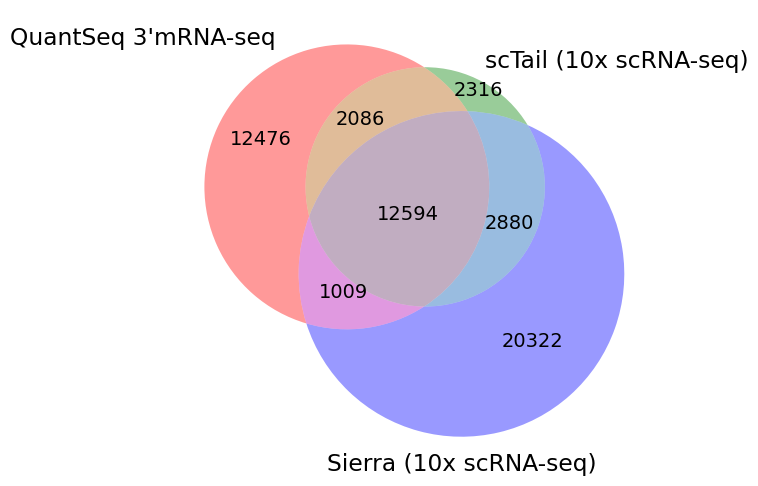

In [44]:
plt.rcParams['font.size'] = 14


fig, ax = plt.subplots(figsize=(7,6))
venn = venn3(subsets=(12476, 2316, 2086, 20322,1009 , 2880, 12594),
             set_labels=("QuantSeq 3'mRNA-seq", 'scTail (10x scRNA-seq)', 'Sierra (10x scRNA-seq)'))
for idx, subset in enumerate(venn.subset_labels):
    venn.subset_labels[idx].set_visible(True)
#plt.savefig('/mnt/ruiyanhou/nfs_share2/three_primer/figure/Venn_plot_k562_50bp.pdf',dpi=300,bbox_inches='tight')
plt.show()
#plt.close()